In order to successfully complete this assignment you must follow all instructions in this notebook and upload your files with your answers on or before **11:59pm on Friday January 21th**.

# Homework 1: 1D Wave Equation

In this homework we will solve the wave equation in 1-D through a finite difference approach using Euler's method. The purpose of the assignment is to allow students to compare and benchmark language choice and its impact on time to science using an easy to describe and read, mostly memory coherent application.

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Implement a 1D wave equation using the finite difference method
* Conduct a timing study of your code


The 1D wave equation can be thought of as a wave propagating along a string.

<img src="https://i.stack.imgur.com/75vyK.gif" width=50%>


The wave equation is an  second-order linear partial differential equation for the description of waves as they occur in classical physics (for example: water waves, sound waves and seismic waves, light waves).  The basic algorithm splits the wave into a grid of points and calculates the point's position, velocity and acceleration.  The key incite to making the wave equations work that an individuals point will lead/follow the behavior of that points neighbors.  


In the 1D case we will model a line of points in the x-direction such that thy can only move in the y direction. The position for each point  $y$ can be calculated by the particle's previous position and the particle's velocity multiplied by the change in time:

$$y_{i+1} = y_i + \dot{y}_idt$$

Notation:
$$\frac{dy}{dt} = \dot{y} = v = \text{velocity of particle in y direction}$$

We calculation the velocity using the acceleration:

$$\dot{y}_{i+1} = \dot{y}_i + \ddot{y}_idt$$

Notation:
$$\frac{d^2y}{dt^2} = \frac{dv}{dt} = \ddot{y} = a = \text{acceleration of particle in y direction}$$


Given the above equations,  if we know the starting values $y_0$, $\dot{y}_0$, $\ddot{y}_0$ then the only unknown is the equation for how the acceleration changes.  

**Wave Equation:** We will estimate acceleration in time by using acceleration in space. Intuitively we can think about this as any point can estimate where it will be in the future by looking at it's neighbors. Mathematically we show this equation as follows:


$$\frac{d^2y}{dt^2} = \gamma\frac{d^2y}{dx^2}$$

We know the acceleration in space using the Euler's finite difference of the particle's position:

$$\frac{d^2y}{dx^2} \approx \frac{y[i+1]-2y[i]+y[i-1]}{dx^2}$$

To get the above equation we estimate the velocity to the Left and Right (Before and After) the point of interest using Finite Difference:

$$\dot{y}[i]_L = \frac{y[i]-y[i-1]}{dx}$$

$$\dot{y}[i]_R = \frac{y[i+1]-y[i]}{dx}$$

Second, using the Left and Right Velocity,  we use finite difference again to estimate the acceleration:

$$\ddot{y}[i] = \frac{\dot{y}[i]_R - \dot{y}[i]_L}{dx}$$

Putting it all together and simplifying we get the followign:

$$\ddot{y}[i] = \frac{y[i+1]-2y[i]+y[i-1]}{dx^2}$$

Given the above we can calculate a points position at time step $t+1$ by using it's position/velocity at timestep $t$ and it's neighbors position at time step $t-1$.


# 1. Implement the 1D wave equation

<font color=red>**DO THIS:**</font> Write a 1D wave equation in your program language of choice using the following pseudocode as a guide. 

Pseudocode and settings for 1D Wave Equation

> ### Divide simulation into grid in the x direction
> 
> $xmin = 0; xmax=10; nx=500$
>
> $dx = \frac{xmax-xmin}{nx}$
>
> $x = \text{linspace}(xmin, xmax, nx)$  #Returns a row vector of nx evenly spaced points between xmin and xmax.
>
> ### Divide time into discrete units
>
> $tmin = 0; tmax=10; nt=1000000$
>
> $dt = \frac{tmax-tmin}{nt}$
>
> $times = \text{linespace}(tmin,tmax, nt)$ #Returns a row vector of nt evenly spaced points between tmin and tmax.
>
> ### Initialize starting position as a simple pulse
>
> $y_i = e^{-(x_i-5)^2}$ for all $i \in [0,nx)$
>
> ### Initialize velocity and acceleration to zero
>
> $\dot{y}_i = 0$ for all $i \in [0,nx)$
>
> $\ddot{y}_i = 0$ for all $i \in [0,nx)$
>
> $\gamma = 1$
>
> ### Run the simulation of t timesteps
> Loop over index $t$ in $times$:
>
>    > $\ddot{y}_0 = 0$ # Keep acceleration to zero on ends
>    >
>    > $\ddot{y}_{nx-1} = 0$ # Keep acceleration to zero on ends
>    >
>    > $\ddot{y}_i \approx \gamma \frac{y_{(i+1)} + y_{(i-1)}-2y_i}{dx^2}$ for all $i \in (0,nx-1)$ # Estimate acceleration using position
>    > 
>    > $y_i = y_i + \dot{y}_i dt$   for all $i \in [0,nx)$ # Update position
>    >
>    > $\dot{y}_{t+1} = \dot{y}_t+ \ddot{y}_tdt$   for all $i \in [0,nx)$ # Update velocity


In [25]:
from numpy import *
import matplotlib.pyplot as plt
from scipy import linalg, integrate
import numpy as np
from IPython.display import display, clear_output
import time
import numba
from numba import jit, autojit
%matplotlib inline
from numpy import *

In [26]:
import time


In [79]:
# %%timeit  ## THIS IS THE ONE


# # i = linspace(1,nx-2,nx-2,dtype=int)
# @jit
# def wfn1d():
#     xmin = 0
#     xmax = 10
#     nx = 500
#     x = linspace(xmin, xmax, nx)
#     dx = (xmax - xmin)/(nx-1)

#     tmin = 0
#     tmax = 10
#     nt = 1000

#     times = linspace(tmin, tmax, nt)
#     dt = (tmax - tmin)/nt
#     y = exp(-(x - 5)**2)
#     v = zeros(nx)
#     a = zeros(nx)

#     for t in times:

#         a[1:-1] = (y[:-2] + y[2:] - 2*y[1:-1])/(dx)**2

#         v += a*dt
#         y += v*dt

#     return a

# wfn1d()
# # print(y-exp(-(x-5)**2))
# # print("DO TIMES")

In [80]:
%%timeit  ## THIS IS THE ONE
xmin = 0
xmax = 10
nx = 500
x = linspace(xmin, xmax, nx)
dx = (xmax-xmin)/(nx-1)

tmin = 0
tmax = 10
nt = 1000000
times = linspace(tmin, tmax, nt)
times.size
dt = (tmax-tmin)/(nt-1)

y = exp(-(x-5)**2)

v = zeros(nx)
a = zeros(nx)

for t in times:
    a[1:-1] = (y[:-2] + y[2:] - 2*y[1:-1])/(dx)**2

    v += a*dt
    y += v*dt
# print(y-exp(-(x-5)**2))
# print("DO TIMES")

18.1 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# git some 

# 2. Timeing / Scaling Study

<font color=red>**DO THIS:**</font> Conduct a timing study of your 1D wave equation.  Make sure you have run it enough times to get accurate results.  (You are encouraged to compare timing results if you have different versions of the code and/or if you run your code on different machines)

In [83]:
print("PYTHON_LOCAL: ", average([18.1]), " seconds")
print("dev-intel14: ", average([.361, .363, .362, .363, .363]), " seconds")
print("dev-intel14-phi: could not get onto it sorry Dirk.",)
print("dev-intel14-k20: ", average([.362, .361, .361, .362, .362]), " seconds")
print("dev-intel16: ", average([.255, .258, .253, .257, .259]), " seconds")
print("dev-intel16-k80: ", average([.216, .215, .215, .216, .215]), " seconds")
print("dev-intel18: ", average([.194, .195, .194, .194, .193]), " seconds")
print("A certain grad-students computer: ", average([.212]), " seconds")
print("\nSystem times tended to be around .002 seconds on better systems, the above are real times.")

PYTHON_LOCAL:  18.1  seconds
dev-intel14:  0.36239999999999994  seconds
dev-intel14-phi: could not get onto it sorry Dirk.
dev-intel14-k20:  0.36160000000000003  seconds
dev-intel16:  0.2564  seconds
dev-intel16-k80:  0.21539999999999998  seconds
dev-intel18:  0.194  seconds
A certain grad-students computer:  0.212  seconds

System times tended to be around .002 seconds on better systems, the above are real times.


PYTHON_LOCAL:    18.1  seconds

dev-intel14:     0.3624  seconds

dev-intel14-phi: could not get onto it sorry Dirk.

dev-intel14-k20: 0.3616  seconds

dev-intel16:     0.2564  seconds

dev-intel16-k80: 0.2154  seconds

dev-intel18:     0.1940  seconds

A certain grad-students computer:  0.212  seconds

# 3. Homework Report

Write a short (approx. 1-page) report for this homework.  Include the report and all of your code/instructions when you turn in the project. Make sure the report answers the following questions:

<font color=red>**QUESTION:**</font>  How long did it take to execute the simulation above?

<font color=red>**QUESTION:**</font> What programming language/version did you use to implement your 1D wave equation?

<font color=red>**QUESTION:**</font> What instructions are needed for the instructor to reproduce your results? i.e. what commands are needed to compile your code?  What libraries (if any) Libraries are needed?  Do not assume that the instructor is familiar with your language. Make sure instructions are complete. Write them as if you were giving them to another student in this course or maybe CMSE202. 

<font color=red>**QUESTION:**</font>  Describe the computer which you conducted the timing study (CPU speed, RAM, OS, software version, Cores used, etc.).

<font color=red>**QUESTION:**</font>  Describe ways you could make your program go faster. 

While my original plan was to write a code that does the graphical side through python, the computation through FORTRAN, and have it all run through python using f2py, but that plan fell through because Dr. Scott Pratt believes assigning 15 hours of homework a week is an effective way to teach students.

So I just wrote it in serial with FORTRAN, and timed it, with no writing of the y-positions to a .dat file.

On dev-intel18, when complied using ifort with optimizers, it reaches times of less than 200 milliseconds to run the entire code.

I wrote instructions for running and timing the code inside the directory, in a README.txt file. The simple_make script should also load all necessary libraries, but its possible I am loading a module in my .bashrc that you will need to load yourself.

I really don't know what the hardware being used on the hpcc nodes are... how can I find out? 

I also don't really know how to make it go faster, other than doing a parrallel calculation by dividing the 500 x positions into smaller segments, and giving those to different cores... but I'm not certain it would speed it up.
As far as I know, FORTRAN is the fastest language for this kind of thing... is there a faster one?

# 4. Optional Bonus

Using your code, generate a visualization of the simulation similar to the animated gif at the top of this notebook. Include this visualization as part of your report.

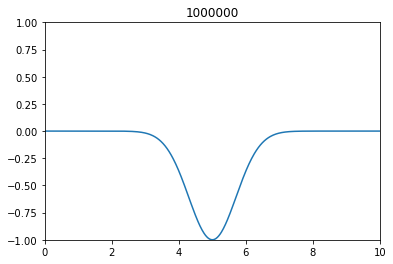

In [85]:
fig, ax = plt.subplots(figsize=(6,4))

xmin = 0
xmax = 10
nx = 500
x = linspace(xmin, xmax, nx)
dx = (xmax-xmin)/nx

tmin = 0
tmax = 10
nt = 1000000
# nt = 3000
times = linspace(tmin, tmax, nt)
dt = (tmax-tmin)/nt

y = exp(-(x-5)**2)

v = zeros(nx)
a = zeros(nx)

i = linspace(1,nx-2,nx-2,dtype=int)

ax.set_xlim(0,10)
ax.set_ylim(0,1)
ax.plot(x,y)

clear_output(wait=True) 
display(fig)            
ax.clear()        
time.sleep(0.0001)
num = 0

for t in times:
    a[1:-1] = (y[:-2] + y[2:] - 2*y[1:-1])/(dx)**2

    #v += a*dt
    y += v*dt
    v += a*dt
    num+=1
    if num%5000 != 0:
        continue   
    ax.set_xlim(0,10)
    ax.set_ylim(-1,1)
    ax.plot(x, y)
    ax.set_title(num)
    clear_output(wait=True) 
    display(fig)            
    ax.clear()        
    time.sleep(0.0001)
fig.clear()

----

### Turning in your homework

Now, you need to submit this assignment by uploading your files to the course Desire2Learn web page. Make sure you include your report and source code so the instructor can reproduce your results. 

&#169; Copyright 2019,  Michigan State University Board of Trustees

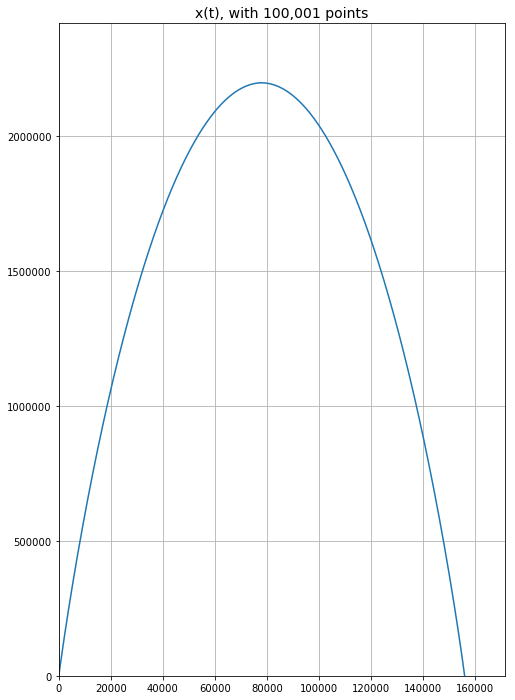

In [241]:
fig, ax = plt.subplots(figsize=(8,12))

m = 2.5
v = 75
L = 10
U0 = 15
E = (1/2) * m * v**2

xmin = 0
xmax = L*(E/U0)**2
dx = (xmax - xmin)/50000

x = array([0])
t = array([0])
while True:
    U = U0 * (x[-1]/L)**(1/2)
    T = E - U
    if x[-1] == xmax:
        break
    oldv = v
    v = (2*T/m)**(1/2)
    t = append(t, t[-1] + dx*(1/v + 1/oldv)/2 )
    x = append(x, x[-1]+dx)
x = append(x, x[-2])
t = append(t, 2*t[-1]-t[-2])
while True:
    U = U0 * (x[-1]/L)**(1/2)
    T = E - U
    if x[-1] == 0:
        break
    oldv = v
    v = (2*T/m)**(1/2)
    t = append(t, t[-1] + dx*(1/v + 1/oldv)/2 )
    x = append(x, x[-1]-dx)

    
plt.ylim(0,xmax*1.1)
plt.xlim(0, t[-1]*1.1)
plt.grid()
plt.title("x(t), with 100,001 points", fontsize=14)
plt.plot(t,x)
plt.savefig("PRINTIT.png", dpi=300)

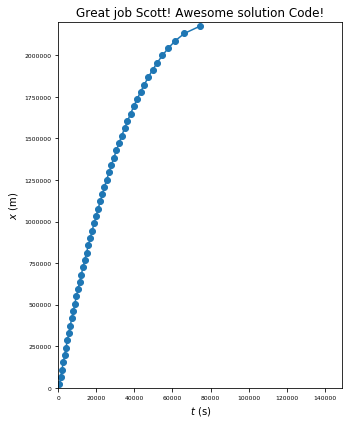

In [270]:
import pandas as pd
the_data = pd.read_csv('scotts_data2.csv', sep='\s+')
tdat = the_data.t 
xdat = the_data.x
vdat = the_data.v
# the_data.columns
fig, ax = plt.subplots(figsize=(5,6))
ax.plot(tdat, xdat,'-o')
tdat_2 = tdat.max() + tdat.values[::-1]
tdat_3 = -tdat_2+tdat.max()*3
# ax.plot(tdat_3, xdat.values[::-1], color='C0', ls='-', marker='o', )
ax.set_title('Great job Scott! Awesome solution Code!')
ax.set_xlabel('$t$ (s)')
ax.set_ylabel('$x$ (m)')
ax.set_xlim(0, 74582.5*2)
ax.set_ylim(0, 2.19727e6)
ax.tick_params(labelsize=6)
plt.tight_layout()
plt.savefig('scotts_halfassed_graph.png', dpi=300)
plt.show()